In [46]:

import pandas as pd
import seaborn as sns

In [47]:
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv("bestsellers with categories.csv")
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [48]:
#Виведіть розміри датасету (використовуйте атрибут shape)
df.shape


(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 550 книг

In [49]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) Відповідь: ні

In [50]:
#Перевірте, чи у всіх рядків вистачає даних:
# виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? Відповідь: 'Non Fiction', 'Fiction'

<Axes: xlabel='price', ylabel='Count'>

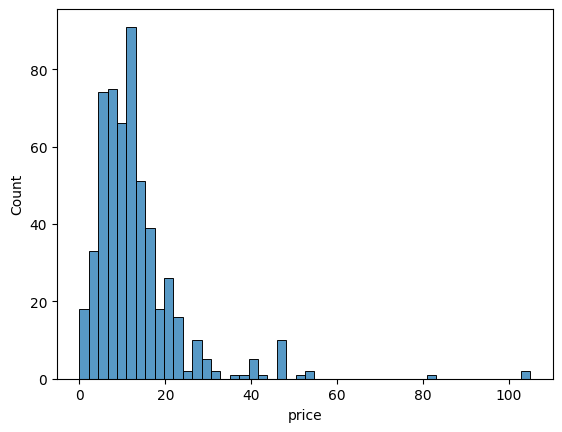

In [51]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
#Я не знайшов функцію, яка має атрибут kind='hist'
sns.histplot( x='price', data=df,)


In [52]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
df.agg({'price': ['min', 'max', 'mean', 'median']})

,price
min,0.0
max,105.0
mean,13.1
median,11.0


Максимальна ціна?
Мінімальна ціна?
Середня ціна?
Медіанна ціна?  
Відповідь: на таблиці все написанно 

In [53]:
df['user_rating'].max()


4.9

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [54]:
best_rating= df[df['user_rating'] == df['user_rating'].max()]
best_rating.shape

(52, 7)

Скільки книг мають такий рейтинг? Відповідь: 52

In [55]:
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків? Відповідь: "Where the Crawdads Sing"

In [56]:
df_2015= df[df['year'] == 2015]
df_2015[df_2015['price'] == df_2015['price'].max()]['name']

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
Відповідь: "publication manual of the american psychological association"

In [57]:
df[(df['genre'] == 'Fiction') & (df['year']== 2010)].shape

(20, 7)

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [58]:
best_rating[best_rating['year'].isin([2010, 2011])]


,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [59]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, 
#які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df[ (df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку? Відповідь: "Old School (Diary of a Wimpy Kid #10)"	

In [60]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів 
#(використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
df.groupby('genre').agg({'reviews':[min, max] ,'price':[min, max],'user_rating':[min, max], 'year':[min, max] })

C:\Users\Вова\AppData\Local\Temp\ipykernel_12576\1838485074.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('genre').agg({'reviews':[min, max] ,'price':[min, max],'user_rating':[min, max], 'year':[min, max] })
C:\Users\Вова\AppData\Local\Temp\ipykernel_12576\1838485074.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('genre').agg({'reviews':[min, max] ,'price':[min, max],'user_rating':[min, max], 'year':[min, max] })
C:\Users\Вова\AppData\Local\Temp\ipykernel_12576\1838485074.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future

reviews        price      user_rating       year      
                min    max   min  max         min  max   min   max
genre                                                             
Fiction         548  87841     0   82         3.3  4.9  2009  2019
Non Fiction      37  61133     0  105         4.0  4.9  2009  2019

Максимальна ціна для жанру Fiction: 87841

Мінімальна ціна для жанру Fiction: 548

Максимальна ціна для жанру Non Fiction: 61133

Мінімальна ціна для жанру Non Fiction: 37

In [61]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів 
#(використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
author_count= df.groupby('author').agg({'name': 'count'})
print(author_count)
author_count.shape

                            name
author                          
Abraham Verghese               2
Adam Gasiewski                 1
Adam Mansbach                  1
Adir Levy                      1
Admiral William H. McRaven     1
...                          ...
Walter Isaacson                3
William Davis                  2
William P. Young               2
Wizards RPG Team               3
Zhi Gang Sha                   2

[248 rows x 1 columns]


(248, 1)

Якої розмірності вийшла таблиця? Відповідь: (248, 1)

In [62]:
author_count[author_count['name'] == author_count['name'].max()]

,name
author,
Jeff Kinney,12


Який автор має найбільше книг? Відповідь: Jeff Kinney 


Скільки книг цього автора? Відповідь:12


In [63]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора 
#(використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
author_rate = df.groupby('author').agg({'user_rating': 'mean'})
author_rate=author_rate['user_rating'].round(1)
author_rate[author_rate == author_rate.min()]

author
Donna Tartt    3.9
Name: user_rating, dtype: float64

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

In [64]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
#(Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
author_df = pd.concat([author_count, author_rate], axis=1)
author_df.columns = ['number_of_books' , 'user_rating']
author_df

,number_of_books,user_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4
William P. Young,2,4.6


In [65]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
author_df.sort_values(by=['number_of_books' , 'user_rating'])

,number_of_books,user_rating
author,,
Muriel Barbery,1,4.0
Chris Cleave,1,4.1
Ian K. Smith M.D.,1,4.1
Pierre Dukan,1,4.1
Elizabeth Strout,1,4.2
...,...,...
American Psychological Association,10,4.5
Gary Chapman,11,4.7
Suzanne Collins,11,4.7


Який автор перший у списку?: Muriel Barbery

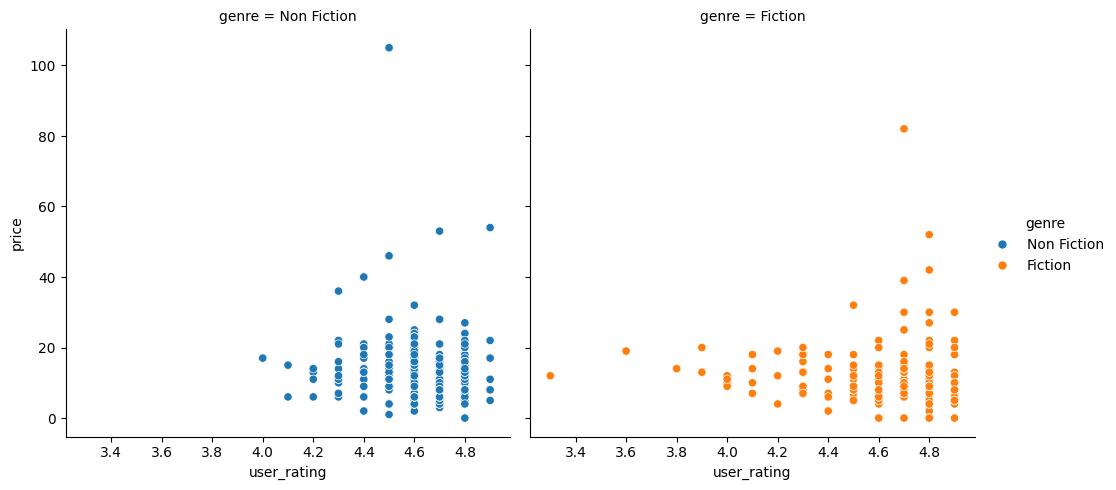

In [66]:
sns.relplot(x='user_rating', y='price', data=df , kind='scatter' , hue='genre', col='genre')

<Axes: xlabel='year', ylabel='reviews'>

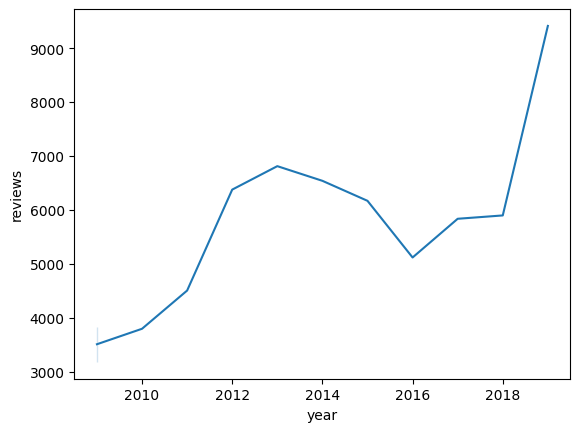

In [67]:
Jeff_df = df[df['author'] == 'Jeff Kinney']
sns.lineplot( x='year', y='reviews', data=Jeff_df)